C:\ProgramData\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)



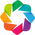

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.charts import HeatMap, bins, output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [3]:
cit = pd.read_csv('datasets/GephiMatrix_co-citation.csv', encoding='latin-1')

In [6]:
author.head(5)

,Jim_Thomas,Eleftherios_Koutsofios,Lawrence_A._Rowe,Jonathan_I._Helfman,Mary_Brewster,Min_Chen,Christopher_G._Healey,Mac_Holden,M._Gray,Jason_Stewart,...,Allan_Kuchinsky,Ben_Shneiderman,Marc_Alexa,E._Petajan,C._Levit,T._Raita,Chris_Greenhalgh,Michael_L._Dertouzos,Staffan_Björk.1,Ken_Pier
0,1.000000,0.097384,0.125630,0.109691,0.275405,0.195006,0.196239,0.317986,0.407599,0.0,...,0.158035,0.238107,0.230967,0.117254,0.112948,0.608428,0.050252,0.349612,0.156353,0.000000
1,0.097384,1.000000,0.223607,0.144620,0.281718,0.235008,0.383180,0.365148,0.132508,0.0,...,0.343792,0.243184,0.052705,0.298142,0.264931,0.116445,0.000000,0.181084,0.222246,0.298142
2,0.125630,0.223607,1.000000,0.242536,0.094491,0.181902,0.123579,0.255155,0.027778,0.0,...,0.131036,0.302167,0.058926,0.291667,0.392031,0.032547,0.000000,0.193255,0.016205,0.000000
3,0.109691,0.144620,0.242536,1.000000,0.229175,0.294118,0.173840,0.049507,0.053897,0.0,...,0.050849,0.199626,0.085749,0.323381,0.025355,0.063151,0.485071,0.160701,0.424474,0.000000
4,0.275405,0.281718,0.094491,0.229175,1.000000,0.297927,0.336302,0.115728,0.356966,0.0,...,0.237729,0.326510,0.222718,0.314970,0.079026,0.295241,0.000000,0.354783,0.220498,0.000000


In [8]:
#Split the author table vertically into 10 different dataframes of size 100x1000 (actually 1053)
compressed = np.split(author, [100, 200, 300, 400, 500, 600, 700, 800, 900], axis=1)

In [26]:
#create an empty dataframe big_table (10x10), which will later contain the total means of the 100 sub-dataframes
big_table = pd.DataFrame()
for s in range(10):
    big_table[s] = []
big_table

#column_array will be used to fill the big_table dataframe
column_array=[]
for i in range(10):
    for x in range(10):
        #pick a part of the dataframe and caluculate the total mean, then add it to the column_array
        p=compressed[i].iloc[100*x + 0:100*x + 100]
        averag = pd.DataFrame(p.mean())
        averag = float (averag.sum())/100
        column_array.append(averag)
    #now we have the first column of the big_table, the column array is added to big_table and is reset for the next column
    big_table[i] = column_array
    column_array=[]


big_table.index.name = 'Sections'
big_table.reset_index(inplace=True)
melted_table = pd.melt(big_table, id_vars=['Sections'], var_name='section', value_name='Value')
#Apparently, the sections column has to consist of strings in stead of integers 1 to 10
melted_table['section'] =  10*['section 0'] + 10*['section 1'] + 10*['section 2'] + 10*['section 3'] + 10*['section 4'] + 10*['section 5'] + 10*['section 6'] + 10*['section 7'] + 10*['section 8'] + 10*['section 9']

In [27]:
TOOLTIPS=[("Interval", "@Value"),("Names", "(@x, @y)"),]
big_heatmap = HeatMap(melted_table, x='section', y='Sections', values='Value', xgrid=True, stat=None, tools='reset, wheel_zoom,pan', tooltips=TOOLTIPS)
show(big_heatmap)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0546e9aa-fea8-44fc-806a-c96ea66f73c1', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='85810485-1345-4d8a-866e-4a694ff1b755', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='9ff6ade1-8066-4e3f-a42a-e741ff5eee8d', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='da2af264-6dd8-4c50-8659-987af5791488', ...)


In [15]:
test = compressed[0].iloc[0:100]
test.index.name = 'Names'
test.reset_index(inplace=True)
parts = pd.melt(test, id_vars=['Names'], var_name='Names_row', value_name='Value')

In [28]:
Hover_things=[("Interval", "@Value"),("Names", "(@x, @y)"),]


hmm = HeatMap(parts, x='Names_row', y='Names', values='Value', xgrid=True, stat=None, tools='wheel_zoom,pan, reset', tooltips=Hover_things)

show(hmm)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='36539c7b-f344-469b-91fc-b649609528dd', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='4682fe81-bf37-4bfd-812d-d45629109079', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='9644c52a-f05f-48be-b48c-ba7468e66af3', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='cb932b62-e590-4e68-892e-681deb155c6a', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='dfda1373-cf9d-48eb-a79b-1c13c6d604e3', ...)
E-1010 (CDSVIEW

In [24]:
grid = gridplot([[big_heatmap, hmm]])
show(grid)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='266be7a6-8b47-402f-9ffa-ffc16695a498', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='27ac7bc9-82c8-4be4-968d-4b9a13da02e8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='3735ec0d-eb44-464f-8c64-14f79129d003', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='6c865c68-adb5-4281-94b5-402242f9ad43', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='7dfc720f-e6c3-42e7-8cf6-beeb3a7ed25e', ...)
E-1010 (CDSVIEW

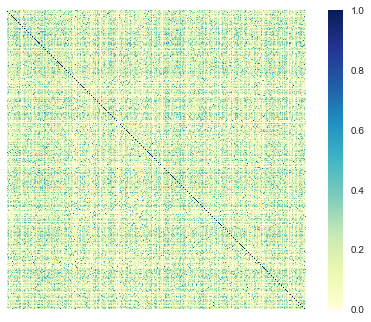

In [5]:
author = pd.read_csv('datasets/GephiMatrix_author_similarity.csv')
j = sns.heatmap(author, square=True, yticklabels=False, xticklabels=False, cmap="YlGnBu");

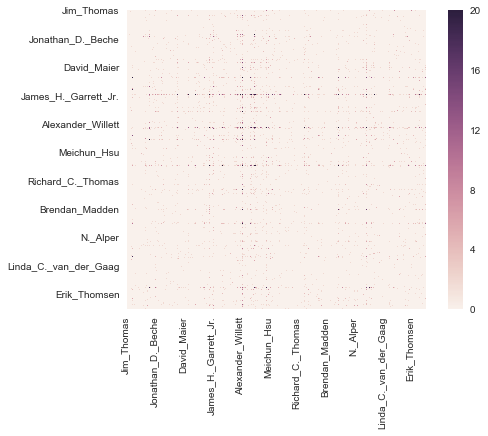

In [4]:
sns.heatmap(cit, square=True, yticklabels=100, xticklabels=100, vmax=20);

In [32]:
cit.index.name = 'Names'
cit.reset_index(inplace=True)
citation = pd.melt(cit, id_vars=['Names'], var_name='Names_row', value_name='Value')
citation.head()
#hv.HeatMap(citation)

,Names,Names_row,Value
0,Jim_Thomas,Jim_Thomas,2.0
1,Eleftherios_Koutsofios,Jim_Thomas,0.0
2,Lawrence_A._Rowe,Jim_Thomas,0.0
3,Jonathan_I._Helfman,Jim_Thomas,0.0
4,Mary_Brewster,Jim_Thomas,8.0


In [34]:
#hv.HeatMap(authro)
#hv.HeatMap(citation)